In [1]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
import pandas as pd

# leemos el dataset
data = pd.read_csv("emails.csv")

# mezclamos los datos y separamos 70% para entrenamiento y 30% para test
train, test = train_test_split(data, test_size=0.3, random_state=0)

# generamos conjuntos de validacion cruzada con k=5
kf = KFold(n_splits=5)

# inicializamos los clasificadores
gnb = GaussianNB()
mnb = MultinomialNB()

# inicializamos las listas para guardar los resultados
gnb_scores = []
mnb_scores = []

# iteramos sobre los conjuntos de validacion cruzada
for train_index, val_index in kf.split(train):
    # obtenemos los datos de entrenamiento y validacion
    train_data, val_data = train.iloc[train_index], train.iloc[val_index]
    # entrenamos los clasificadores con todas las columnas menos la primera (id) y ultima (prediccion)
    gnb.fit(train_data.iloc[:, 1:-1], train_data["Prediction"])
    mnb.fit(train_data.iloc[:, 1:-1], train_data["Prediction"])
    # predecimos los datos de validacion
    gnb_pred = gnb.predict(val_data.iloc[:, 1:-1])
    mnb_pred = mnb.predict(val_data.iloc[:, 1:-1])
    # calculamos la precision de los clasificadores
    gnb_score = accuracy_score(val_data["Prediction"], gnb_pred)
    mnb_score = accuracy_score(val_data["Prediction"], mnb_pred)
    # guardamos los resultados
    gnb_scores.append(gnb_score)
    mnb_scores.append(mnb_score)

# calculamos la precision promedio de los clasificadores
gnb_avg_score = sum(gnb_scores) / len(gnb_scores)
mnb_avg_score = sum(mnb_scores) / len(mnb_scores)

# imprimimos los resultados en una tabla
table = PrettyTable()
table.field_names = ["Clasificador", "Pliegue", "Precisión"]
for i in range(len(gnb_scores)):
    table.add_row(["GaussianNB", i, gnb_scores[i]])
table.add_row(["GaussianNB", "Promedio", gnb_avg_score])

for i in range(len(mnb_scores)):
    table.add_row(["MultinomialNB", i, mnb_scores[i]])
table.add_row(["MultinomialNB", "Promedio", mnb_avg_score])

print(table)

+---------------+----------+--------------------+
|  Clasificador | Pliegue  |     Precisión      |
+---------------+----------+--------------------+
|   GaussianNB  |    0     | 0.9475138121546961 |
|   GaussianNB  |    1     | 0.9571823204419889 |
|   GaussianNB  |    2     | 0.9502762430939227 |
|   GaussianNB  |    3     | 0.9516574585635359 |
|   GaussianNB  |    4     | 0.9447513812154696 |
|   GaussianNB  | Promedio | 0.9502762430939227 |
| MultinomialNB |    0     | 0.9516574585635359 |
| MultinomialNB |    1     | 0.9447513812154696 |
| MultinomialNB |    2     | 0.9433701657458563 |
| MultinomialNB |    3     | 0.9461325966850829 |
| MultinomialNB |    4     | 0.9433701657458563 |
| MultinomialNB | Promedio | 0.9458563535911602 |
+---------------+----------+--------------------+


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



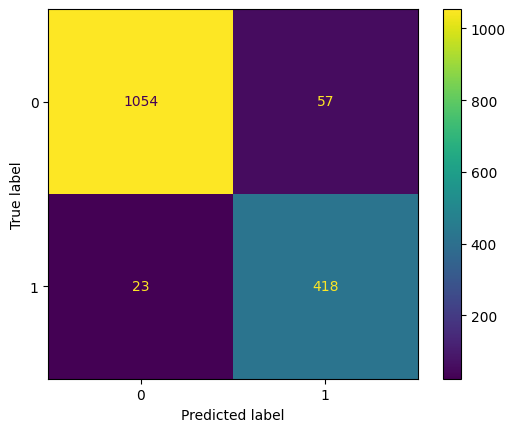

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtenemos la matriz de confusión de GaussianNB
train_data, val_data = train, test

# Entrenamos con todas las columnas excepto Prediction
gnb.fit(train_data.iloc[:, 1:-1], train_data["Prediction"])

# Predecimos los datos de test
gnb_pred = gnb.predict(val_data.iloc[:, 1:-1])

# Imprimimos el reporte de clasificación
print(classification_report(val_data["Prediction"], gnb_pred))

cm = confusion_matrix(val_data["Prediction"], gnb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

In [3]:
# Calculamos el accuracy y lo mostramos en una tabla junto con el tipo de distribucion
table = PrettyTable()
accuracy = accuracy_score(val_data["Prediction"], gnb_pred)
table.field_names = ["Clasificador", "Precisión", "Distribución"]
table.add_row(["GaussianNB", accuracy, "Normal"])

print(table)

+--------------+--------------------+--------------+
| Clasificador |     Precisión      | Distribución |
+--------------+--------------------+--------------+
|  GaussianNB  | 0.9484536082474226 |    Normal    |
+--------------+--------------------+--------------+
